# Exploratory Data Analysis (EDA)

## Emotion Face Classifier Notebook 2

Generates summary and visuals of counts of emotion by usage.

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from datascifuncs.tidbit_tools import load_json, write_json, print_json, check_directory_name

In [5]:
main_dir = 'EmotionFaceClassifier'
check_directory_name(main_dir)

Directory set to /Users/dsl/Documents/GitHub/EmotionFaceClassifier, matches target dir string EmotionFaceClassifier.


True

In [6]:
from utils.eda import (
    plot_emotion_counts_plotly
)

In [7]:
os.makedirs('imgs', exist_ok=True)

In [8]:
# Load common dicts from json config file
common_dicts = load_json('./configs/input_mappings.json')
print_json(common_dicts)

{
    "usage_dict": {
        "Training": "Training",
        "PublicTest": "Testing",
        "PrivateTest": "Testing"
    },
    "emo_dict": {
        "0": "Angry",
        "1": "Disgust",
        "2": "Fear",
        "3": "Happy",
        "4": "Sad",
        "5": "Surprise",
        "6": "Neutral"
    },
    "emo_color_dict": {
        "Angry": "red",
        "Disgust": "olive",
        "Fear": "black",
        "Happy": "gold",
        "Sad": "blue",
        "Surprise": "darkviolet",
        "Neutral": "slategray"
    },
    "style_dict": {
        "Angry": {
            "color": "red",
            "Training": 1.0,
            "Testing": 0.5
        },
        "Disgust": {
            "color": "olive",
            "Training": 1.0,
            "Testing": 0.5
        },
        "Fear": {
            "color": "black",
            "Training": 1.0,
            "Testing": 0.5
        },
        "Happy": {
            "color": "gold",
            "Training": 1.0,
            "Testing": 0.5

In [9]:
# Select emotion mapping section of json
emo_dict = common_dicts['emo_dict']
print_json(emo_dict)

{
    "0": "Angry",
    "1": "Disgust",
    "2": "Fear",
    "3": "Happy",
    "4": "Sad",
    "5": "Surprise",
    "6": "Neutral"
}


In [10]:
# Select color mappings for emotion categories
emo_color_dict = common_dicts['emo_color_dict']
print_json(emo_color_dict)

{
    "Angry": "red",
    "Disgust": "olive",
    "Fear": "black",
    "Happy": "gold",
    "Sad": "blue",
    "Surprise": "darkviolet",
    "Neutral": "slategray"
}


In [11]:
# Style dict
style_dict = common_dicts['style_dict']
print_json(style_dict)

{
    "Angry": {
        "color": "red",
        "Training": 1.0,
        "Testing": 0.5
    },
    "Disgust": {
        "color": "olive",
        "Training": 1.0,
        "Testing": 0.5
    },
    "Fear": {
        "color": "black",
        "Training": 1.0,
        "Testing": 0.5
    },
    "Happy": {
        "color": "gold",
        "Training": 1.0,
        "Testing": 0.5
    },
    "Sad": {
        "color": "blue",
        "Training": 1.0,
        "Testing": 0.5
    },
    "Surprised": {
        "color": "darkviolet",
        "Training": 1.0,
        "Testing": 0.5
    },
    "Neutral": {
        "color": "slategray",
        "Training": 1.0,
        "Testing": 0.5
    }
}


In [12]:
# Read in FER 2013 data
fer2013_path = 'data/fer2013_paths.csv'
fer2013 = pd.read_csv(fer2013_path)

In [13]:
# Check column names and shape
print(fer2013.columns)
print(fer2013.shape)

Index(['emotion_id', 'pixels', 'Usage', 'emotion', 'image', 'usage',
       'emo_count_id', 'img_path', 'color'],
      dtype='object')
(35887, 9)


In [14]:
# Check emotion values
print(sorted(fer2013['emotion'].unique()))

['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']


In [15]:
# Create groupby counts of each emotion
gby = fer2013.groupby(['emotion', 'usage'], as_index=False).size()
print(gby)

     emotion     usage  size
0      Angry   Testing   958
1      Angry  Training  3995
2    Disgust   Testing   111
3    Disgust  Training   436
4       Fear   Testing  1024
5       Fear  Training  4097
6      Happy   Testing  1774
7      Happy  Training  7215
8    Neutral   Testing  1233
9    Neutral  Training  4965
10       Sad   Testing  1247
11       Sad  Training  4830
12  Surprise   Testing   831
13  Surprise  Training  3171


In [16]:
gby.sort_values(by=['usage'], ascending=False, inplace=True)

In [17]:
gby

,emotion,usage,size
1,Angry,Training,3995
3,Disgust,Training,436
5,Fear,Training,4097
7,Happy,Training,7215
9,Neutral,Training,4965
11,Sad,Training,4830
13,Surprise,Training,3171
0,Angry,Testing,958
2,Disgust,Testing,111
4,Fear,Testing,1024


In [18]:
gby = gby.rename(columns={'size':'Count'})

In [19]:
emo_color_dict

{'Angry': 'red',
 'Disgust': 'olive',
 'Fear': 'black',
 'Happy': 'gold',
 'Sad': 'blue',
 'Surprise': 'darkviolet',
 'Neutral': 'slategray'}

In [20]:
gby['color'] = gby['emotion'].map(emo_color_dict)

gby['opacity'] = gby['usage'].apply(lambda x: 1.0 if x == 'Training' else 0.5)
gby

,emotion,usage,Count,color,opacity
1,Angry,Training,3995,red,1.0
3,Disgust,Training,436,olive,1.0
5,Fear,Training,4097,black,1.0
7,Happy,Training,7215,gold,1.0
9,Neutral,Training,4965,slategray,1.0
11,Sad,Training,4830,blue,1.0
13,Surprise,Training,3171,darkviolet,1.0
0,Angry,Testing,958,red,0.5
2,Disgust,Testing,111,olive,0.5
4,Fear,Testing,1024,black,0.5


# Data Summary and Count Visualizations

In [22]:
import plotly.express as px

In [77]:
emo_color_dict

{'Angry': 'red',
 'Disgust': 'olive',
 'Fear': 'black',
 'Happy': 'gold',
 'Sad': 'blue',
 'Surprise': 'darkviolet',
 'Neutral': 'slategray'}

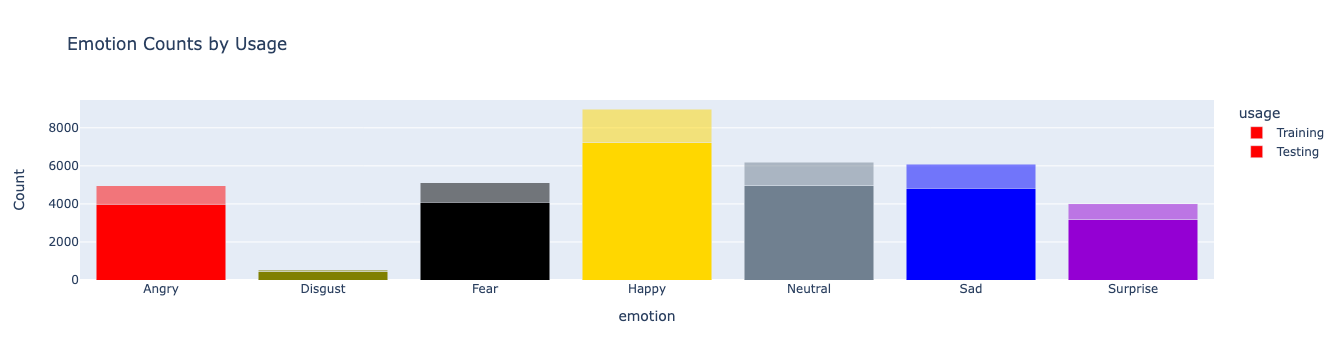

In [81]:
fig = px.bar(
    data_frame=gby, 
    x='emotion', 
    y='Count',
    color='usage', 
    barmode='stack', 
    title='Emotion Counts by Usage'
)

# Update traces using the style dictionary for color and opacity
for trace in fig.data:
    dataset_type = trace.name  # The name will be 'Train' or 'Test'
    
    # Extract the corresponding color for each emotion and set the opacity based on 'Train' or 'Test'
    colors = [emo_color_dict[emotion] for emotion in trace.x]  # Get color for each corresponding emotion in x values
    opacity = 1.0 if dataset_type == 'Training' else 0.7  # Set opacity based on dataset type

    # Update the trace with custom colors and opacity
    trace.update(marker=dict(color=colors, opacity=opacity))

fig.show()

In [63]:
for trace in fig.data:
    emo = trace.x[0]
    print(f'emo is: {emo}.')
    print(trace.name)

emo is: Angry.
Training
emo is: Angry.
Testing


In [65]:
trace.x

array(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'],
      dtype=object)

In [67]:
# Update traces using the style dictionary
for trace in fig.data:
    emotion = trace.legendgroup  # Use legendgroup to identify the emotion associated with the trace
    dataset_type = trace.name    # The name will be 'Train' or 'Test'

    print(f'emotion is: {emotion}')
    print(f'usage is: {dataset_type}.')
    
    # # Set color and opacity using the style dictionary
    # if emotion in style_dict and dataset_type in ['Train', 'Test']:
    #     trace.update(
    #         marker_color=style_dict[emotion]['color'],
    #         opacity=style_dict[emotion][dataset_type]
    #     )

emotion is: Training
usage is: Training.
emotion is: Testing
usage is: Testing.


In [69]:
trace.legendgroup

'Testing'

In [75]:
len(fig.data)

2

In [71]:
trace

Bar({
    'alignmentgroup': 'True',
    'hovertemplate': 'usage=Testing<br>emotion=%{x}<br>Count=%{y}<extra></extra>',
    'legendgroup': 'Testing',
    'marker': {'color': 'red', 'pattern': {'shape': ''}},
    'name': 'Testing',
    'offsetgroup': 'Testing',
    'opacity': 0.5,
    'orientation': 'v',
    'showlegend': True,
    'textposition': 'auto',
    'x': array(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'],
               dtype=object),
    'xaxis': 'x',
    'y': array([ 958,  111, 1024, 1774, 1233, 1247,  831]),
    'yaxis': 'y'
})

In [83]:
type(trace)

plotly.graph_objs._bar.Bar

In [24]:
# # ,
# #     color_discrete_sequence=px.colors.qualitative.Plotly)

# # Manually update traces to apply colors from the dataframe
# fig.for_each_trace(lambda trace: trace.update(marker_color=df[df['emotion'] == trace.name]['color'].iloc[0], opacity=df[df['usage'] == trace.name]['opacity'].iloc[0]))

# fig = apply_plotly_formatting(fig, title=title, xlabel='Emotion', ylabel='Count')

# # Update the layout to capitalize the legend title
# fig.update_layout(legend_title_text=color.capitalize())

# # Save the plot if save_path is provided
# if save_path:
#     fig.write_image(save_path)

# # Display the plot
# fig.show()

In [25]:
# plot_emotion_counts_plotly(
#     df=gby, 
#     x='emotion',
#     y='Count',
#     color='usage', 
#     title='Emotion Counts Split by Usage (Train/Test)',
#     save_path=os.path.join('imgs', 'emotion_counts_plotly.png'),
#     stacked=False
# )

In [26]:
# plot_emotion_counts_plotly(
#     df=gby, 
#     x='emotion',
#     y='Count',
#     color='usage', 
#     title='Emotion Counts Split by Usage (Train/Test)',
#     save_path=os.path.join('imgs', 'emotion_counts_plotly.png'),
#     stacked=True
# )

## Pivots grouped by Emotion and Usage

In [28]:
# # skim will generate and save a file with basic descriptives
# for df_str, pd_df in df_dict.items():
#     piv_df = emotion_count_piv(
#         df=pd_df,
#         gby_cols=['emotion', 'train_test_split'], 
#         agg_col='Filename',
#         count_cols=['Training', 'Testing']
#     )

#     # Skim package for a nice overview, saved to save_path below
#     out_path = os.path.join('imgs', f'{df_str}_counts_skim.svg')
#     skim_get_figure(piv_df, save_path=out_path)

#     # Bar plot of emotion image counts
#     piv_stacked_bar(df=piv_df, label=df_str)

#     # Waffle plot of distribution
#     waffle_path = os.path.join('imgs', f'{df_str}_waffle_chart.png')
#     waffle_chart(
#         df=piv_df, group_col='Emotion', data_col='TotalImages', 
#         save_path=waffle_path, display=False, total_squares=100,
#         color_dict=emo_color_dict
#     )

#     # Save pivoted data
#     intermediate_data_dir = os.path.join('data', 'intermediate_data')
#     os.makedirs(intermediate_data_dir, exist_ok=True)
#     piv_save_path = os.path.join(intermediate_data_dir, f'{df_str}_emo_piv.csv')
#     piv_df.to_csv(piv_save_path)

## Example Images

In [30]:
# display_images=False
# for df_str, pd_df in df_dict.items():
#     # Creates image with 1 example face/emotion
#     fig, axes = show_example_images(
#         df=pd_df, group_col='emotion', image_col='Full Path', 
#         save_path=f'./imgs/{df_str}_examples_1.png', samples=1,
#         display=display_images)

#     # Creates image with 3 example face/emotion
#     fig, axes = show_example_images(
#         df=pd_df, group_col='emotion', image_col='Full Path', 
#         save_path=f'./imgs/{df_str}_examples_3.png', samples=3,
#         display=display_images)